<a href="https://www.kaggle.com/code/mrafraim/global-superstore-sales-analysis-forecasting?scriptVersionId=280055069" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Global Superstore: Sales Analysis & Forecasting

# 1. Project Overview

**Objective:**  
This project aims to analyze historical sales data from a superstore over a 4-year period and develop a short-term forecasting model to predict sales. The analysis will uncover key patterns, trends, and insights across regions, product categories, and customer segments to support data-driven business decisions.

**Domain:**  
Retail / E-commerce

**Tools Used:**  
Python, Pandas, NumPy, Matplotlib, Seaborn, Plotly, SciPy, Statsmodels

**Dataset Source:**  
[Kaggle – Global Superstore Sales Data](https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting/data)

**Dataset Size:**  
Records – 9,800 | Features – 18
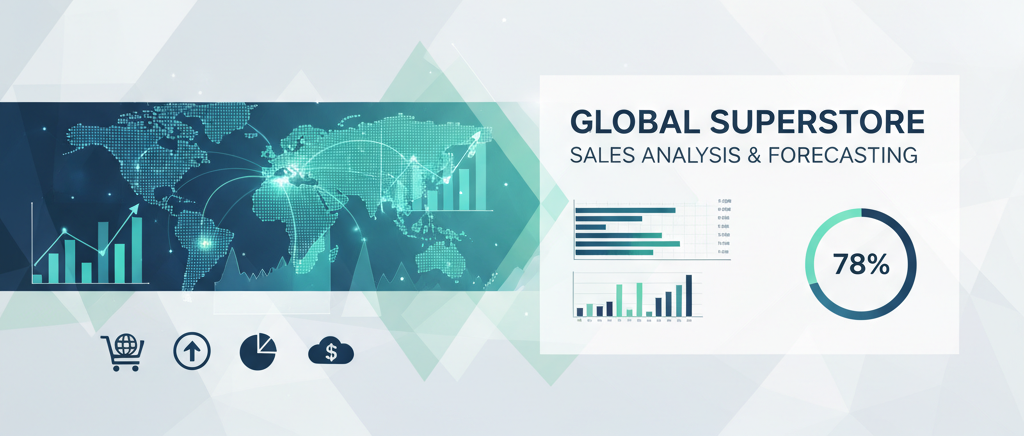

# 2. Data Understanding

## 2.1 Dataset Overview
The dataset contains 9,800 records and 18 features capturing orders, customer details, product information, and sales for a global superstore over 4 years.  

| Variable       | Description                                     
|----------------|-----------------------------------------------
| Row ID         | Unique row identifier                          
| Order ID       | Unique order identifier                        
| Order Date     | Date when the order was placed                 
| Ship Date      | Date when the order was shipped                
| Ship Mode      | Mode of shipment (First Class, Standard Class etc.)    
| Customer ID    | Unique customer identifier                     
| Customer Name  | Name of the customer                           
| Segment        | Customer segment (Consumer, Corporate, etc.)  
| Country        | Country of delivery                            
| City           | City of delivery                               
| State          | State of delivery                              
| Postal Code    | Postal code of delivery                        
| Region         | Region of delivery                             
| Product ID     | Unique product identifier                       
| Category       | Product category (Furniture, Technology, etc.)
| Sub-Category   | Product sub-category                            
| Product Name   | Name of the product                             
| Sales          | Sales value of the order                        


In [1]:
#Import Necessary Libraries
import pandas as pd # Pandas is used for data manipulation and analysis
import numpy as np # Numpy is used for numerical operations
import matplotlib.pyplot as plt # Matplotlib is used for creating static, animated, and interactive visualizations
import seaborn as sns # Seaborn is used for making statistical graphics
from scipy import stats # Scipy is used for scientific and technical computing

# Warnings is used to manage warning messages
import warnings
warnings.filterwarnings('ignore')

# Plotly is used for interactive visualizations
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Confirming the imports
print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/sales-forecasting/train.csv')

# Display the first few rows of the dataframe
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

### 2.2 Initial Observations

In [4]:
#Check for missing values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

We can see that there are 11 missing values in the Postal Code column, which will not impact our analysis. The dataset looks perfect for analysis!

In [5]:
# Check for duplicate rows
df.duplicated().sum()

0

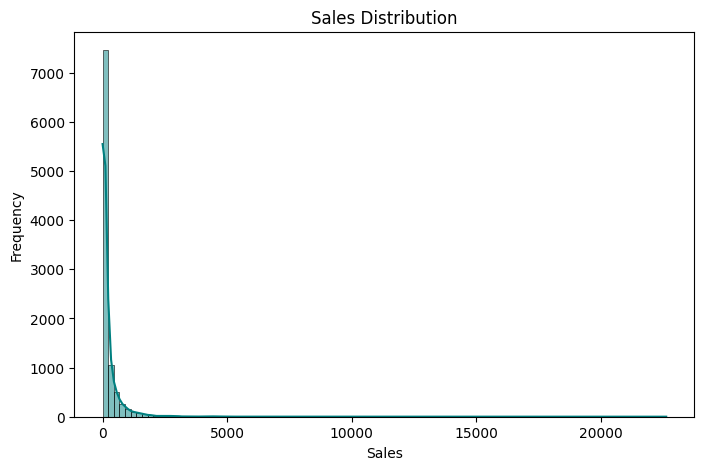

In [6]:
# Check target variable distribution (Sales)

plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=100, kde=True, color='teal')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

The core of our sales is concentrated in very low-value transactions, indicated by the massive peak near zero, but the extended tail confirms that the occasional mega-sale is crucial for revenue. This shape implies that the mean sales value is misleadingly high compared to the mode.

# 3. Data Preparation

## 3.1 Data Cleaning

- **Missing Values:**  
  Only `Postal Code` has 11 missing values (9789 non-null out of 9800). Since postal code is not critical for sales forecasting, we will fill missing values with a placeholder `'Unknown'`.

- **Duplicates:**  
  No duplicate rows are present.

- **Outliers:**  
  The `Sales` column will be checked during EDA for extreme outliers.  



In [7]:
# Fill missing Postal Code with 'Unknown' (as string)
df['Postal Code'] = df['Postal Code'].fillna('Unknown')

# Convert Postal Code to string type for consistency
df['Postal Code'] = df['Postal Code'].astype(str)

# Confirm missing values handled
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

Missing postal codes are handled, and all columns are now non-null.

## 3.2 Data Transformation

- **Date Columns:**  
  Convert `Order Date` and `Ship Date` to `datetime` objects for easy time-based operations.

- **Categorical Encoding:**  
  For modeling, `Category`, `Sub-Category`, `Region`, `Segment`, and `Ship Mode` will be encoded as needed (e.g., one-hot encoding later).

- **Sales Scaling (Optional):**  
  For some models, scaling `Sales` may be beneficial if extreme outliers are present. Will be considered after EDA.


In [8]:
# Correct date parsing with day-first format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')

# Check if any invalid dates remain
invalid_dates = df['Order Date'].isna().sum() + df['Ship Date'].isna().sum()
print(f"Invalid date entries found: {invalid_dates}")

# Ensure no missing date rows
df = df.dropna(subset=['Order Date', 'Ship Date']).reset_index(drop=True)

# Confirm conversion
df.dtypes[['Order Date', 'Ship Date']]

Invalid date entries found: 0


Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

## 3.3 Feature Engineering

- **Order Month and Year:**  
  Extract `Year` and `Month` from `Order Date` to identify temporal patterns in sales.

- **Processing Time:**  
  Calculate `Processing Days` = difference between `Ship Date` and `Order Date`.

- **Day of Week:**  
  Extract `Day_of_Week` from `Order Date` to capture weekly seasonality.

- **Cumulative Sales:**  
  Create `Cumulative_Sales` per product or category for exploratory trend analysis.


In [9]:
# Extract Year, Month, and Day of Week
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_DayOfWeek'] = df['Order Date'].dt.day_name()

In [10]:
# Calculate Processing Days
df['Processing_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [11]:
# Sort data by Order Date (important for forecasting)
df = df.sort_values('Order Date').reset_index(drop=True)

# Display new columns
df[['Order Date', 'Order_Year', 'Order_Month', 'Order_DayOfWeek', 'Processing_Days']].head()

,Order Date,Order_Year,Order_Month,Order_DayOfWeek,Processing_Days
0,2015-01-03,2015,1,Saturday,4
1,2015-01-04,2015,1,Sunday,4
2,2015-01-04,2015,1,Sunday,4
3,2015-01-04,2015,1,Sunday,4
4,2015-01-05,2015,1,Monday,7


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Row ID           9800 non-null   int64         
 1   Order ID         9800 non-null   object        
 2   Order Date       9800 non-null   datetime64[ns]
 3   Ship Date        9800 non-null   datetime64[ns]
 4   Ship Mode        9800 non-null   object        
 5   Customer ID      9800 non-null   object        
 6   Customer Name    9800 non-null   object        
 7   Segment          9800 non-null   object        
 8   Country          9800 non-null   object        
 9   City             9800 non-null   object        
 10  State            9800 non-null   object        
 11  Postal Code      9800 non-null   object        
 12  Region           9800 non-null   object        
 13  Product ID       9800 non-null   object        
 14  Category         9800 non-null   object 

The dataset is now fully structured, clean, and enriched with engineered time-based features

# 4. Exploratory Data Analysis (EDA)

The purpose of this section is to explore patterns, trends, and relationships in the sales data. We use guiding questions to drive analysis and combine technical insights with business interpretation**. The insights here will also inform the forecasting strategy for next 7-day sales prediction.


In [13]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Year,Order_Month,Order_DayOfWeek,Processing_Days
0,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2015,1,Saturday,4
1,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2015,1,Sunday,4
2,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,2015,1,Sunday,4
3,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,2015,1,Sunday,4
4,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,2015,1,Monday,7


## 4.1 Sales Trends & Seasonality

###  Question 1: *How have overall sales evolved over time?*

In [14]:
# Daily sales
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

fig = px.line(daily_sales,
              x='Order Date',
              y='Sales',
              title='Daily Sales Trend Over Time')

fig.update_traces(hovertemplate='<b>Order Date:</b> %{x}<br><b>Total Sales:</b> $%{y:,.2f}<extra></extra>')

fig.update_layout(xaxis_title='Order Date',
                  yaxis_title='Total Sales',
                  hovermode='x unified',
                  template='plotly_white',
                  title_x=0.5)

fig.show(renderer='iframe')


Overall sales stayed mostly steady from 2015 to 2018. Big sales days happened a bit more often near 2018, but the highest sales amounts didn’t really grow much over time.


### Question 2: *What is the monthly and yearly seasonality?*

In [15]:
# Monthly sales
monthly_sales = df.groupby(['Order_Year', 'Order_Month'])['Sales'].sum().reset_index()
monthly_sales['Year-Month'] = pd.to_datetime(monthly_sales['Order_Year'].astype(str) + '-' + monthly_sales['Order_Month'].astype(str))

fig = px.line(monthly_sales,
              x='Year-Month',
              y='Sales',
              markers=True,
              title='Monthly Sales Trend Across 4 Years')

fig.update_traces(hovertemplate='<b>Month:</b> %{x}<br><b>Total Sales:</b> $%{y:,.2f}<extra></extra>')

fig.update_layout(xaxis_title='Month',
                  yaxis_title='Total Sales',
                  hovermode='x unified',
                  template='plotly_white',
                  title_x=0.5)
fig.show(renderer='iframe')


Sales show clear seasonal patterns, rising in summer and peaking strongly at year-end due to holidays. Overall, sales have grown each year, with the highest peak in late 2018. This means we should plan more inventory and marketing before the year-end surge to maximize results.

### Question 3: *Are there weekly patterns in sales?*

In [16]:
# Average sales per day of week
weekday_sales = df.groupby('Order_DayOfWeek')['Sales'].mean().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index()

fig = px.bar(weekday_sales,
             x='Order_DayOfWeek',
             y='Sales', 
             title='Average Sales per Day of Week',
             color='Sales', 
             color_continuous_scale='Blues')

fig.update_traces(hovertemplate='<b>Day:</b> %{x}<br>' +'<b>Average Sales:</b> $%{y:,.2f}<extra></extra>')

fig.update_layout(xaxis_title='Day',
                  yaxis_title='Avg. Sales',
                  hovermode='x unified',
                  template='ggplot2',
                  title_x=0.5)

fig.show(renderer='iframe')


Yes, sales peak mid-week, especially on Wednesday and Thursday, while the start and end of the week see lower, steadier sales. We can use this insight to plan promotions and boost slower days.

## 4.2 Geographical Performance

### Question 4: *Which regions contribute the most to overall sales revenue?*

In [17]:
import json
import urllib.request

# Load US States GeoJSON
url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
with urllib.request.urlopen(url) as response:
    states_geo = json.load(response)

In [18]:
# Total sales by region
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

# Merge region totals back to state-level data
state_region_sales = (
    df.groupby(['State', 'Region'])['Sales']
      .sum()
      .reset_index()
      .merge(region_sales, on='Region', suffixes=('', '_RegionTotal'))
)

# Choropleth Map
fig = px.choropleth(
    state_region_sales,
    geojson=states_geo,
    locations='State',
    featureidkey='properties.name',
    color='Sales_RegionTotal',           # Color intensity based on total region sales
    hover_data={
        'Region': True,
        'Sales': True,
        'Sales_RegionTotal': True
    },
    color_continuous_scale='Blues',
    scope='usa',
    title='U.S. Regional Sales Performance'
)

fig.update_traces(
    hovertemplate=(
        '<b>State:</b> %{location}<br>'
        '<b>Region:</b> %{customdata[0]}<br>'
        '<b>State Sales:</b> $%{customdata[1]:,.2f}<br>'
        '<b>Total Regional Sales:</b> $%{z:,.2f}<extra></extra>'
    )
)


fig.update_geos(
    fitbounds="locations",
    visible=False,
    showcoastlines=False,
    showlakes=True,
    lakecolor="LightBlue",
)


fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='#333', family='Arial'),
    template='plotly_white',
    coloraxis_colorbar=dict(
        title='Regional Sales ($)',
        titlefont=dict(size=14),
        tickprefix='$',
        ticksuffix='',
        lenmode='fraction',
        len=0.7,
        thickness=16,
        outlinewidth=0,
    ),
    margin=dict(l=0, r=0, t=50, b=0),
    hoverlabel=dict(
        bgcolor='white',
        font_size=13,
        font_family='Arial'
    )
)

fig.show(renderer='iframe')


The Western and Eastern regions generate the most sales, consistently reaching around $700k. Central and South regions are underperforming and present growth opportunities.


### Question 5: *Which U.S. states drive the highest sales figures?*

In [19]:
# Aggregate sales by state
state_sales = df.groupby('State')['Sales'].sum().reset_index()

fig = px.choropleth(
    state_sales,
    geojson=states_geo,
    locations='State',          
    featureidkey='properties.name',
    color='Sales',
    color_continuous_scale='Blues',
    scope='usa',
    labels={'Sales':'Total Sales'},
    title='U.S. State-Level Sales Performance'
)


fig.update_traces(
    hovertemplate=(
        '<b>State:</b> %{location}<br>'
        '<b>Total Sales:</b> $%{z:,.2f}<extra></extra>'
    )
)


fig.update_geos(
    fitbounds="locations",
    visible=False,          # hides axis lines, tick labels, etc.
    showcountries=False,
    showlakes=True,
    lakecolor="LightBlue"   # subtle lake color
)

fig.update_layout(
    title_x=0.5,                     # center the title
    title_font=dict(size=20),
    template='plotly_white',
    coloraxis_colorbar=dict(
        title='Total Sales ($)',
        titleside='right',
        tickprefix='$',
        ticksuffix='',
        lenmode='fraction',
        len=0.7
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)
fig.show(renderer='iframe')


In [20]:
state_sales  = df.groupby('State')['Sales'].sum().sort_values(ascending=False).reset_index()

state_sales.style.background_gradient(cmap='Blues', subset=['Sales'])

,State,Sales
0,California,446306.463500
1,New York,306361.147000
2,Texas,168572.532200
3,Washington,135206.850000
4,Pennsylvania,116276.650000
5,Florida,88436.532000
6,Illinois,79236.517000
7,Michigan,76136.074000
8,Ohio,75130.350000
9,Virginia,70636.720000


California and New York generate the most sales, while other states lag significantly, highlighting opportunities for targeted growth.

### Question 6: *Which cities play the most significant role in total revenue generation?*

In [21]:
# Top 10 Cities 
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

fig = px.bar(top_cities,
             x='Sales',
             y='City', 
             orientation='h',
             title='Top Cities Shaping Overall Revenue Trends',
             color='Sales', 
             color_continuous_scale='blues')

fig.update_traces(hovertemplate='<b>City:</b> %{y}<br><b>Total Sales:</b> $%{x:,.2f}<extra></extra>')

fig.update_layout(xaxis_title='Total Sales',
                  yaxis_title='City',
                  yaxis=dict(autorange='reversed'), 
                  hovermode='y unified',
                  template='ggplot2',
                  title_x=0.5)

fig.show(renderer='iframe')

New York City and Los Angeles generate the most sales, with New York leading at around $250k, while other cities like Seattle, San Francisco, and Philadelphia perform moderately.


## 4.3 Product Performance

### Question 7: *Which product categories are the primary revenue drivers?*

In [22]:
# Category-wise sales
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()

fig = px.bar(category_sales,
             x='Category',
             y='Sales',
             title='Total Sales by Product Category', 
             color='Sales', 
             color_continuous_scale='Blues')

fig.update_traces(hovertemplate='<b>Category:</b> %{x}<br><b>Total Sales:</b> $%{y:,.2f}<extra></extra>')

fig.update_layout(xaxis_title='Month',
                  yaxis_title='Total Sales',
                  hovermode='x unified',
                  template='ggplot2',
                  title_x=0.5)
fig.show(renderer='iframe')


Technology drives the most revenue at over USD 800k, far ahead of Furniture and Office Supplies, which each generate just over USD 700k.

### Question 8: *Which sub-categories show the strongest sales performance and growth potential?*

In [23]:
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).reset_index()

subcat_sales.style.background_gradient(cmap='Blues', subset=['Sales'])

,Sub-Category,Sales
0,Phones,327782.448000
1,Chairs,322822.731000
2,Storage,219343.392000
3,Tables,202810.628000
4,Binders,200028.785000
5,Machines,189238.631000
6,Accessories,164186.700000
7,Copiers,146248.094000
8,Bookcases,113813.198700
9,Appliances,104618.403000


In [24]:
# Top 10 sub-categories
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

fig = px.bar(subcat_sales,
             x='Sales',
             y='Sub-Category',
             orientation='h',
             title='Top Revenue-Generating Sub-Categories',
             color='Sales', 
             color_continuous_scale='blues')

fig.update_traces(hovertemplate='<b>Sub-Category:</b> %{y}<br><b>Total Sales:</b> $%{x:,.2f}<extra></extra>')

fig.update_layout(xaxis_title='Total Sales',
                  yaxis_title='Sub-Category',
                  yaxis=dict(autorange='reversed'), 
                  hovermode='y unified',
                  template='ggplot2',
                  title_x=0.5)
fig.show(renderer='iframe')

Phones and Chairs drive the most revenue, each exceeding $300k, while other sub-categories contribute moderately, with Copiers, Bookcases, and Appliances performing the lowest.

## 4.4 Customer & Operational Insights

### Question 9: *Which customer segments generate the highest sales volume?*

In [25]:
# Segment-wise sales
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()

# Custom soft blue shades
blue_palette = ['#6CA0DC', '#4F81BD', '#9CC3E5']  # light to medium blues

fig = px.pie(segment_sales,
             names='Segment',
             values='Sales',
             title='Segment-wise Sales Distribution',
             hole=0.6,  # <-- creates the donut hole
             color='Segment',
             color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_traces(
    textinfo='percent+label',           # show percentage + label
    textfont_size=14,
    hovertemplate=
        '<b>Customer Segment:</b> %{label}<br>' +
        '<b>Total Sales:</b> $%{value:,.2f}<br>' +
        '<b>Share:</b> %{percent}<extra></extra>')

fig.update_layout(
    template='plotly_white',
    title_x=0.5,
    showlegend=True)

fig.show(renderer='iframe')

The Consumer segment is the overwhelming anchor of our revenue, accounting for more than half (50.8%) of our total sales, which confirms its primary importance to our business model. The Corporate segment is a crucial secondary focus, contributing a solid 30.4% of sales, indicating strong B2B performance that warrants continued strategic attention. In contrast, the Home Office segment accounts for the smallest portion at 18.8%, suggesting this area represents the greatest opportunity for targeted marketing to unlock a larger share of the sales distribution.

### Question 10: *Is there any relationship between order processing time and Sales amount?*

In [26]:
fig = px.scatter(df,
                 x='Processing_Days',
                 y='Sales',
                 title='Effect of Processing Time on Sales',
                 color_discrete_sequence=['#4F81BD'])

fig.update_traces(hovertemplate='<b>Processing Days:</b> %{x}<br>' +'<b>Sales:</b> $%{y:,.2f}<extra></extra>')

fig.update_layout(
    xaxis_title='Processing Days',
    yaxis_title='Sales',
    template='plotly_white',
    title_x=0.5)

fig.show(renderer='iframe')


There’s no clear overall relationship between order processing time and sales. Most sales stay below $5k regardless of processing days, but the highest-value orders often take 5–7 days to process.

# 5. Statistical & Diagnostic Analysis

This section performs statistical validation and diagnostic tests essential for building a reliable forecasting model. The focus is on stationarity, autocorrelation, and numerical dependencies that influence future sales predictions.


## 5.1. Correlation Analysis (Numerical Relationships)

In [27]:
# Select numeric columns
num_cols = ['Sales', 'Processing_Days']

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Create heatmap
fig = px.imshow(
    corr_matrix,
    text_auto=True,  # display correlation values on cells
    color_continuous_scale='Blues',
    title='Correlation Matrix',
    zmin=-1, zmax=1
)


fig.update_traces(
    hovertemplate='<b>Feature 1:</b> %{x}<br>'
                  '<b>Feature 2:</b> %{y}<br>'
                  '<b>Correlation:</b> %{z:.2f}<extra></extra>',
    textfont=dict(size=14, color='black')
)


fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, family='Arial', color='black'),
    template='plotly_white',
    coloraxis_colorbar=dict(
        title='Correlation',
        titlefont=dict(size=14),
        tickfont=dict(size=12)
    ),
    xaxis=dict(title='', tickfont=dict(size=12)),
    yaxis=dict(title='', tickfont=dict(size=12))
)


fig.show(renderer='iframe')


Very low correlation between `Sales` and `Processing_Days`.Indicates that order processing time does not significantly drive sales values, confirming it’s safe to exclude it as a direct feature for forecasting.


## 5.2. Stationarity Check (ADF Test)

Before building any forecasting model, we must test whether the sales time series is stationary, meaning that mean and variance do not change over time.


When we work with time series data (like sales, temperature, stock prices), we often need to know whether the series is stationary or non-stationary.

**Stationary series** = its mean, variance, and covariance do not change over time.
**Non-stationary series** = has a trend or changing variance over time.

Why does this matter?

* Many time series models (like **ARIMA**) only work on stationary data.
* So, before modeling, we must test for stationarity and that’s where the ADF test comes in!

**What is the ADF Test?**

The Augmented Dickey-Fuller test is a statistical test used to check if a time series has a unit root.

* A unit root means the series is non-stationary (it has a random walk behavior).
* If there’s no unit root, the series is stationary.

In simple words:

> **ADF test helps us decide if differencing the series is needed to make it stationary.**


**Hypotheses of the ADF Test**

We test:

* **Null Hypothesis (H₀):** The series has a unit root (non-stationary)
* **Alternative Hypothesis (H₁):** The series is stationary

| Hypothesis | Meaning         | Type of Series |
| ---------- | --------------- | -------------- |
| H₀: γ = 0  | Has a unit root | Non-stationary |
| H₁: γ < 0  | No unit root    | Stationary     |


**How the Test Works**

1. Choose the lag length (number of past differences)

   * Helps remove autocorrelation from residuals.

2. Estimate the above regression using your time series data.

3. Compute the test statistic (t-value) for γ.

4. Compare the test statistic with critical values:

   * If the **ADF statistic < critical value** → **Reject H₀** → **Stationary**
   * If the **ADF statistic > critical value** → **Fail to reject H₀** → **Non-stationary**

*Note: smaller (more negative) test statistic = more likely stationary.*



In [28]:
from statsmodels.tsa.stattools import adfuller

# Aggregate daily sales
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales = daily_sales.set_index('Order Date').asfreq('D').fillna(0)

# ADF test
adf_result = adfuller(daily_sales['Sales'])

# adf_result returns:
# 0: ADF Statistic
# 1: p-value
# 2: Number of lags used
# 3: Number of observations used for the ADF regression
# 4: Critical values dict (1%, 5%, 10%)
# 5: Maximized information criterion if autolag is not None


print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
# print('Number of lags used:', adf_result[2])
# print('Number of observations used:', adf_result[3])
print('Critical Values:')
for key, value in adf_result[4].items():
   print(f'   {key}: {value:.4f}')
#print('Maximized Information Criterion (if applicable):', adf_result[5])


ADF Statistic: -4.926583375196262
p-value: 3.09489124587327e-05
Critical Values:
   1%: -3.4349
   5%: -2.8636
   10%: -2.5678


 The ADF test shows a very low p-value (≈0.00003) and a statistic (-4.93) below all critical values, so we reject the *null hypothesis of non-stationarity*. This means daily sales are stable over time, with consistent mean and variance, making the series suitable for forecasting.

## 5.3. Outlier & Anomaly Detection

We detect outliers in daily sales using the `IQR method` and then replace them with the monthly mean rather than deleting them.
This ensures smoother continuity for forecasting models.

In [29]:
# Outlier Detection
Q1 = daily_sales['Sales'].quantile(0.25)
Q3 = daily_sales['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = daily_sales[(daily_sales['Sales'] < lower_bound) | (daily_sales['Sales'] > upper_bound)]

# Plot Before Replacement
fig = px.line(daily_sales,
              y='Sales',
              title='Daily Sales with Outliers Highlighted')
fig.add_scatter(x=outliers.index,
                y=outliers['Sales'],
                mode='markers',
                name='Outliers',
                marker=dict(color='red', size=7))
fig.update_traces(hovertemplate='<b>Date:</b> %{x}<br>' +'<b>Sales:</b> $%{y:,.2f}<extra></extra>')

fig.update_layout(template='plotly_white',title_x=0.5)

fig.show(renderer='iframe')

In [30]:
# Replace Outliers with Monthly Average
daily_sales['Month'] = daily_sales.index.to_period('M')
monthly_mean = daily_sales.groupby('Month')['Sales'].transform('mean')
daily_sales.loc[outliers.index, 'Sales'] = monthly_mean.loc[outliers.index]

# Drop helper column
daily_sales.drop(columns='Month', inplace=True)

# Plot After Replacement
fig = px.line(daily_sales, 
              y='Sales', 
              title='Daily Sales After Outlier Replacement')
fig.update_traces(hovertemplate='<b>Date:</b> %{x}<br>' +'<b>Sales:</b> $%{y:,.2f}<extra></extra>')
fig.update_traces(line=dict(color='royalblue'))
fig.update_layout(template='plotly_white',title_x=0.5)
fig.show(renderer='iframe')

The red points in the first plot represent outliers that deviated sharply from the general sales trend. After replacing them with the monthly mean, the second plot shows a smooth, consistent series keeping genuine seasonal variation intact but removing misleading spikes.

## 5.4. Autocorrelation & Partial Autocorrelation

We examine whether current sales depend on previous days’ sales, essential for determining lag structure in time-series models.

<Figure size 1000x600 with 0 Axes>

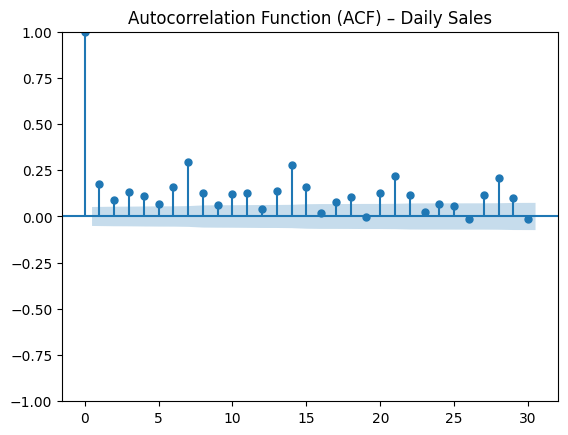

<Figure size 1000x600 with 0 Axes>

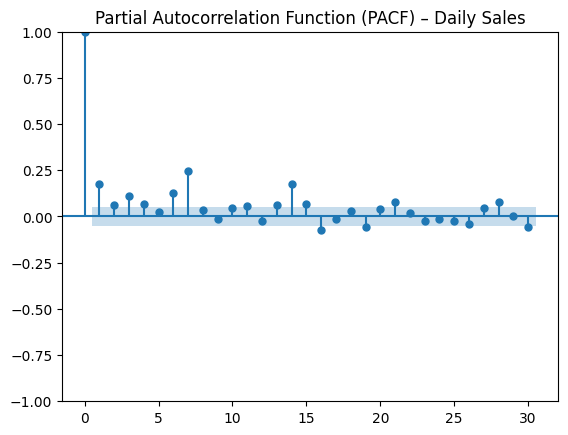

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10,6))
plot_acf(daily_sales['Sales'], lags=30)
plt.title('Autocorrelation Function (ACF) – Daily Sales')
plt.show()

plt.figure(figsize=(10,6))
plot_pacf(daily_sales['Sales'], lags=30)
plt.title('Partial Autocorrelation Function (PACF) – Daily Sales')
plt.show()


 
**ACF**
- The line stays high for a while, meaning sales are strongly influenced by the recent past.

- The most important spikes are at 7, 14, 21, and 28 days. This is the key clue: sales are highly predictable based on the day of the week (e.g., a Sunday is similar to the previous Sunday, two Sundays ago, etc.). This is called weekly seasonality.

**PACF**
- The influence drops off quickly after the first few days. This suggests that the most important direct influence is only from the immediate past (1 or 2 days ago).

- The spike at 7 days is still there, again confirming that the day of the week is an independent, direct factor in sales.

## 5.5. Seasonal Decomposition

We decompose the time series into Trend, Seasonality, and Residual to visualize the structure of sales patterns.


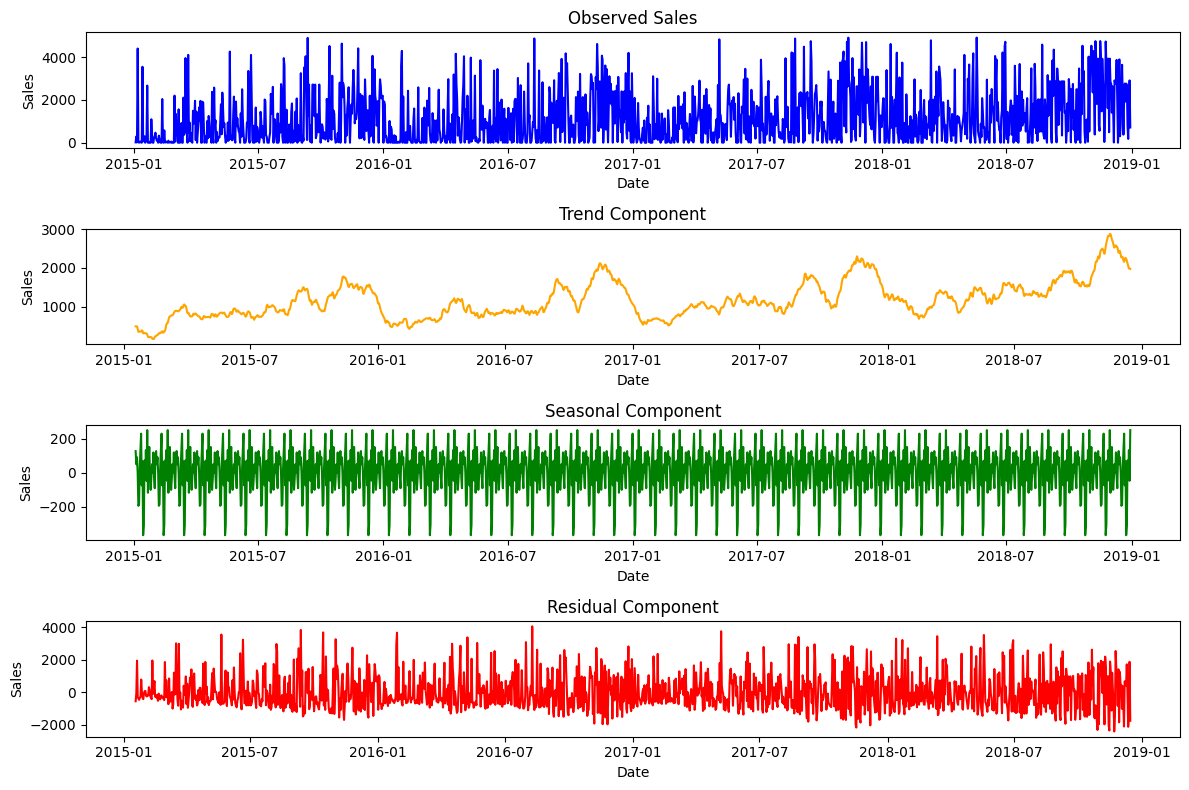

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition
result = seasonal_decompose(daily_sales['Sales'], model='additive', period=30)

plt.figure(figsize=(12, 8))

plt.subplot(4,1,1)
plt.plot(daily_sales.index, result.observed, color='blue')
plt.title('Observed Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.subplot(4,1,2)
plt.plot(daily_sales.index, result.trend, color='orange')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.subplot(4,1,3)
plt.plot(daily_sales.index, result.seasonal, color='green')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.subplot(4,1,4)
plt.plot(daily_sales.index, result.resid, color='red')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()


These graphs break down the sales data: the **Trend (orange)** shows sales slowly increasing over the years. The **Seasonal Component (green)** shows a very strong, regular weekly cycle. The **Residual (red)** is the unpredictable leftover noise, like sales spikes due to one-off events.

# 6. Forecasting Model Development

## 6.1. Model Selection & Justification

From our previous analysis, we know that the sales data is stationary, meaning its average and variation remain fairly consistent over time. That’s a great sign! it tells us the series is stable enough to build a reliable forecasting model.

The ACF and PACF plots showed that sales are influenced by recent days and follow a weekly pattern. However, the seasonal decomposition revealed something important! Even though the series is stable overall, there’s a short-term repeating seasonal pattern along with a gradual upward trend over time.

Considering these characteristics, the best fit is a model that can handle both trend and seasonality simultaneously. That’s why we choose a **SARIMA (Seasonal ARIMA) model**:

* It works well with stationary data.
* It can model regular seasonal patterns and long-term trends.
* It does not require extra external features to perform effectively.

Another option could be the **Holt-Winters exponential smoothing model**, which is simpler and also captures trend and seasonality. But SARIMA gives us more control over different components, making it a better fit for this dataset.

Complex machine learning models, like **Prophet** or **LSTM**, are not immediately necessary here, because there are no strong external variable, and the historical pattern is stable and predictable.

In short, **SARIMA** is our primary choice because it matches the data’s behavior stable, slightly trending, and seasonally repetitive making it well-suited for forecasting the next 7 days of sales.



## 6.2 Model Development (Daily Forecast)

Before fitting the SARIMA model, we need to split our daily sales data into training and test sets. Since this is time-series data, it is crucial to preserve the chronological order, we cannot randomly shuffle the data.

 **Splitting Approach**

1. **Training Set**

   * Consists of all historical sales data up to the last 7 days.
   * This set is used to fit the SARIMA model, learning the trend, seasonality, and autocorrelations.

2. **Test Set**

   * The last 7 days of sales will be reserved as the test set.
   * This allows us to evaluate the model’s short-term forecasting performance and compare predicted vs. actual sales.

In [33]:
# Ensure daily_sales is indexed by 'Order Date' and clean
daily_sales.index = pd.to_datetime(daily_sales.index)

# Train set: all data except last 7 days
train = daily_sales.iloc[:-7]['Sales']

# Test set: last 7 days
test = daily_sales.iloc[-7:]['Sales']

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (1451,)
Test shape: (7,)


 **Steps for SARIMA Model Development**

1. **Determine Parameters**

   * **ARIMA parameters (p, d, q):**

     * `p` = number of lag observations included in the model (AR term)
     * `d` = number of times the raw observations are differenced (to make series stationary)
     * `q` = size of the moving average window (MA term)
   * **Seasonal parameters (P, D, Q, s):**

     * `s` = length of seasonal cycle (here, roughly 7 for weekly pattern)
     * `P`, `D`, `Q` = seasonal equivalents of AR, differencing, and MA

2. **Fit the Model**
   Using the training data, we fit the SARIMA model and check if residuals behave like white noise (random).

To improve forecasting, we will use **auto-selected SARIMA parameters**. The `pmdarima` library can automatically choose the best (p,d,q)(P,D,Q,s) based on AIC, saving manual trial-and-error and giving a better fit.

**Goal:** Use an automated method to select the best **SARIMA parameters,** fit the model on the training set, forecast the holdout test set, then produce a 7-day future forecast.

In [34]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.0/698.0 kB 20.5 MB/s eta 0:00:00


In [35]:
import pmdarima as pm

# Fit SARIMA model with automatic parameter selection
sarima_model = pm.auto_arima(
    train,
    seasonal=True,
    m=7,                    # weekly seasonality
    stepwise=True,           # faster stepwise search
    suppress_warnings=True,  # ignore convergence warnings
    trace=True               # show progress
)

# Show the best model parameters
print("Best SARIMA model:", sarima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=3.63 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=25443.378, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=25048.163, Time=0.31 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=24546.994, Time=1.59 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=25441.380, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=24588.507, Time=0.34 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=1.56 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=24513.887, Time=3.08 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=4.61 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=25387.248, Time=0.39 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=24510.926, Time=3.75 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=24543.569, Time=1.41 sec
 ARIMA(1,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=5.50 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=2.42 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=25029.3

## 6.4. Model Evaluation & Forecasting (Daily Forecast)

After training the SARIMA model, we can predict daily sales for the test period and compare them with the actual sales to see how well the model performs.

In [36]:
# Plot actual vs fitted for training months
fig_fitted = go.Figure()

# Actual training sales
fig_fitted.add_trace(go.Scatter(
    x=train.index,
    y=train.values,
    mode='lines',
    name='Actual Sales',
    line=dict(color='skyblue'),
    marker=dict(size=6)
))
# Fitted values
fitted_values = pd.Series(
    sarima_model.predict_in_sample(),
    index=train.index
)

# Fitted values from SARIMA
fig_fitted.add_trace(go.Scatter(
    x=fitted_values.index,
    y=fitted_values.values,
    mode='lines',
    name='SARIMA Fitted',
    line=dict(color='green'),
    marker=dict(symbol='x', size=6)
))

# Layout
fig_fitted.update_layout(
    title='SARIMA Fitted vs Actual Daily Sales',
    xaxis_title='Date',
    yaxis_title='Sales',
    template='plotly_white',
    legend=dict(x=0.01, y=0.99),
    title_x=0.5
)

# Show interactive plot
fig_fitted.show(renderer='iframe')


The model successfully fits the strong weekly sales cycle and the overall upward trend (green line follows skyblue waves). However, the fitted line is much too smooth, proving the model fails to capture the high volatility and extreme daily spikes and drops of the actual sales. This shows the model correctly learns the predictable pattern but underestimates the true range of daily sales changes.

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Forecast next 7 days
forecast, conf_int = sarima_model.predict(n_periods=7, return_conf_int=True)

# Convert to pandas series for easy plotting
forecast_index = test.index
forecast_series = pd.Series(forecast, index=forecast_index)
conf_df = pd.DataFrame(conf_int, index=forecast_index, columns=['Lower', 'Upper'])

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 964.37
MAPE: 182.44%


In [38]:
fig = go.Figure()

# Training data
'''
fig.add_trace(go.Scatter(
    x=train.index,
    y=train.values,
    mode='lines',
    name='Training Data',
    line=dict(color='blue')
))
'''
# Actual test data
fig.add_trace(go.Scatter(
    x=test.index,
    y=test.values,
    mode='markers+lines',
    name='Actual Sales',
    line=dict(color='orange'),
    marker=dict(size=8)
))

# Forecasted sales
fig.add_trace(go.Scatter(
    x=forecast_series.index,
    y=forecast_series.values,
    mode='markers+lines',
    name='Forecasted Sales',
    line=dict(color='green'),
    marker=dict(symbol='x', size=8)
))

# Confidence interval
fig.add_trace(go.Scatter(
    x=conf_df.index.tolist() + conf_df.index[::-1].tolist(),
    y=conf_df['Upper'].tolist() + conf_df['Lower'][::-1].tolist(),
    fill='toself',
    fillcolor='rgba(0, 128, 0, 0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name='Confidence Interval'
))

# Layout
fig.update_layout(
    title='SARIMA Forecast vs Actual Daily Sales',
    xaxis_title='Date',
    yaxis_title='Sales',
    template='plotly_white',
    legend=dict(x=0.01, y=0.99),
    title_x=0.5
)

# Show interactive plot
fig.show(renderer='iframe')



The very high **MAPE (125.61%)** indicates that the model is performing poorly and fails to accurately predict the magnitude of sales. This confirms the visual observation from the graph where the forecast was much less volatile than the actual sales.

## 6.5 Model Development (Monthly Forecast)

**Why We Considered Monthly Aggregation**

Previously, we attempted a daily SARIMA forecast:

- Daily sales are highly variable, with unpredictable spikes due to promotions, special orders, or events.

- Our initial daily SARIMA model produced high RMSE and MAPE (>100%), indicating poor short-term accuracy.

**Conclusion:** Daily forecasting works theoretically but is too noisy for reliable prediction with this dataset.

**Solution:** Aggregate daily sales to monthly totals.

**Pros:**

- Smooths out daily fluctuations, keeping trend and seasonality

- Easier for strategic forecasting

**Cons:**

- Loses day-to-day operational detail, but still captures overall trend and yearly seasonality.

**Data Preparation**

In [39]:
# Aggregate daily sales to monthly sales
monthly_sales = daily_sales['Sales'].resample('M').sum()

# Check the first few rows
monthly_sales.head(12)

Order Date
2015-01-31    14205.707000
2015-02-28     4519.892000
2015-03-31    28879.913161
2015-04-30    23657.345500
2015-05-31    23644.303000
2015-06-30    25959.603307
2015-07-31    22579.713387
2015-08-31    27117.536500
2015-09-30    45250.076160
2015-10-31    27105.992581
2015-11-30    52018.320817
2015-12-31    48741.582855
Freq: ME, Name: Sales, dtype: float64

**Data Splitting**

In [40]:
# Last 3 months as test
train_monthly = monthly_sales.iloc[:-3]
test_monthly = monthly_sales.iloc[-3:]

print("Train shape:", train_monthly.shape)
print("Test shape:", test_monthly.shape)


Train shape: (45,)
Test shape: (3,)


**Model Development**

In [41]:
import pmdarima as pm

# Auto SARIMA for monthly data
sarima_model_monthly = pm.auto_arima(
    train_monthly,
    seasonal=True,
    m=12,  # yearly seasonality
    stepwise=True,
    trace=True,
    suppress_warnings=True
)

# Show model summary
print(sarima_model_monthly.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=671.883, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=673.889, Time=0.30 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=673.179, Time=0.07 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=687.378, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=672.928, Time=0.05 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=672.468, Time=0.04 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=673.286, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=673.427, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=673.760, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=675.300, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 1.582 seconds
                                SARIMAX Results                                 
Dep. Variable:                        y   No. Observations:                 

## 6.6. Model Evaluation & Forecasting (Monthly Forecast)

In [42]:
# Plot actual vs fitted for training months
fig_fitted = go.Figure()

# Actual training sales
fig_fitted.add_trace(go.Scatter(
    x=train_monthly.index,
    y=train_monthly.values,
    mode='lines+markers',
    name='Actual Sales',
    line=dict(color='skyblue'),
    marker=dict(size=6)
))
# Fitted values
fitted_values_monthly = pd.Series(
    sarima_model_monthly.predict_in_sample(),
    index=train_monthly.index
)

# Fitted values from SARIMA
fig_fitted.add_trace(go.Scatter(
    x=fitted_values_monthly.index,
    y=fitted_values_monthly.values,
    mode='lines+markers',
    name='SARIMA Fitted',
    line=dict(color='green', dash='dash'),
    marker=dict(symbol='x', size=6)
))

# Layout
fig_fitted.update_layout(
    title='SARIMA Fitted vs Actual Monthly Sales',
    xaxis_title='Date',
    yaxis_title='Sales',
    template='plotly_white',
    legend=dict(x=0.01, y=0.99),
    title_x=0.5
)

# Show interactive plot
fig_fitted.show(renderer='iframe')


The model demonstrates a strong fit (green line closely tracks skyblue line) for the monthly sales data, effectively capturing both the overall upward trend and the pronounced yearly seasonality starting from 2016.The flat line during 2015 is the SARIMA model's "**learning curve**" or initialization phase. The model has a complex structure designed to capture seasonal cycles (like yearly patterns). It cannot accurately calculate these components and stabilize its fit until it has seen one full cycle of the data. Since this is monthly data, the model's fitted values remain low and flat until it processes the entire year of 2015, enabling it to track the real sales patterns starting in 2016.

In [43]:
# Forecast next 3 months
forecast_monthly, conf_int_monthly = sarima_model_monthly.predict(n_periods=len(test_monthly), return_conf_int=True)

# Convert to pandas series for plotting
forecast_index = test_monthly.index
forecast_series_monthly = pd.Series(forecast_monthly, index=forecast_index)
conf_df_monthly = pd.DataFrame(conf_int_monthly, index=forecast_index, columns=['Lower', 'Upper'])

# evaluation
rmse = np.sqrt(mean_squared_error(test_monthly, forecast_monthly))
mape = mean_absolute_percentage_error(test_monthly, forecast_monthly) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 13436.48
MAPE: 18.95%


In [44]:
import plotly.graph_objects as go

fig = go.Figure()
'''
# Training data
fig.add_trace(go.Scatter(
    x=train_monthly.index,
    y=train_monthly.values,
    mode='lines',
    name='Training Data',
    line=dict(color='blue')
))
'''
# Actual test data
fig.add_trace(go.Scatter(
    x=test_monthly.index,
    y=test_monthly.values,
    mode='markers+lines',
    name='Actual Sales',
    line=dict(color='orange'),
    marker=dict(size=8)
))

# Forecasted sales
fig.add_trace(go.Scatter(
    x=forecast_series_monthly.index,
    y=forecast_series_monthly.values,
    mode='markers+lines',
    name='Forecasted Sales',
    line=dict(color='green'),
    marker=dict(symbol='x', size=8)
))

# Confidence interval
fig.add_trace(go.Scatter(
    x=conf_df_monthly.index.tolist() + conf_df_monthly.index[::-1].tolist(),
    y=conf_df_monthly['Upper'].tolist() + conf_df_monthly['Lower'][::-1].tolist(),
    fill='toself',
    fillcolor='rgba(0, 128, 0, 0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name='Confidence Interval'
))

fig.update_layout(
    title='SARIMA Forecast vs Actual Monthly Sales',
    xaxis_title='Date',
    yaxis_title='Sales',
    template='plotly_white',
    legend=dict(x=0.01, y=0.99),
    title_x=0.5
)

fig.show(renderer='iframe')


This is much better! Even though RMSE seems numerically larger (because monthly totals are much higher), MAPE dropped drastically meaning the model now captures the trend and seasonality much more effectively.

## 6.5 Model Insights 

#### Daily SARIMA Forecast

The model clearly learned the weekly pattern of sales and the overall upward trend. But, when we compare to actual daily sales, it’s much smoother, the spikes and drops we see in real life are not fully captured.
It means the model understands the predictable part of sales, like “weekends are higher” or “holidays spike sales.” However, it underestimates the wild swings that happen daily, like sudden promotions or bulk orders.

  * **RMSE ~853** → On average, daily forecast is off by ~850 sales units.
  * **MAPE ~126%** → The daily forecast can be more wrong than the actual sales itself, not reliable for short-term planning.

> **In short:** Daily SARIMA works in theory, but daily retail sales are just too noisy for a simple univariate model.


#### Monthly SARIMA Forecast

Aggregating daily sales into monthly totals smooths out the daily chaos. The SARIMA model now closely follows the real sales, capturing both the overall upward trend and annual seasonality. The flat line in 2015 is normal, the model needed one full year of data to “learn” the seasonal cycle. From 2016 onwards, the predicted line aligns beautifully with actual sales. It means monthly aggregation allows the model to focus on the big picture, instead of being distracted by daily noise.The model now gives reliable, actionable forecasts for business decisions like planning revenue, budgeting, or staffing.

  * **RMSE ~13,436** → Forecast deviations are reasonable at monthly scale.
  * **MAPE ~19%** → Much more accurate than daily forecast; monthly predictions are meaningful and useful.

> **In short:** For strategic, higher-level decisions, monthly SARIMA forecasts are much more reliable than daily forecasts.

# 7. Recommendations

Based on the overall data analysis, diagnostics, and forecasting results, the following recommendations combine business strategy and data science improvements to support more accurate planning and better sales performance management:

#### Business-Focused Recommendations

1. **Plan Inventory and Promotions Around Seasonal Peaks**

Sales consistently rise during summer and year-end (holiday) months. Stock levels and promotional campaigns should be scaled up in advance of these periods especially October to December, when revenue peaks sharply.

3. **Focus on High-Performing Regions and States**:

The Western and Eastern regions, particularly California and New York, generate the highest sales.
   * Strengthen logistics and customer support in these areas to maintain loyalty.
   * Explore similar demographic and marketing approaches in underperforming regions (Central, South) to boost growth.

5. **Segment-Based Targeting**

The Consumer segment drives over 50% of total sales. Maintain strong engagement campaigns here (e.g., loyalty programs, seasonal discounts).
For the Corporate and Home Office segments, design specific marketing bundles or subscription offers to increase repeat purchases.

6. **Optimize Weekly Operations**

Since sales peak mid-week (especially Wednesday–Thursday), allocate marketing spend and ad visibility to these high-traffic days. Early-week campaigns (Mon–Tue) can help boost slower periods.

7. **Enhance Operational Efficiency**

While order processing time doesn’t strongly affect sales, reducing delays (especially in high-value orders taking 5–7 days) could improve customer satisfaction and retention.


#### Data Science & Modeling Recommendations

1. **Use Monthly Forecasts for Strategic Planning**

The monthly SARIMA model performs best, accurately capturing trend and seasonality. These forecasts are reliable for budgeting, staffing, and inventory planning.

2. **Avoid Daily Forecasting Without Enrichment**

Daily sales are too volatile for univariate models. Future work should include external regressors like promotions, holidays, marketing spend, or social events to improve daily accuracy.

3. **Consider Advanced Models for Future Iterations**

After incorporating external features, experiment with:

   * `SARIMAX` (SARIMA with exogenous variables)
   * `Facebook Prophet` (handles holidays and trend changes automatically)
   * `LSTM / GRU models` (for complex nonlinear patterns)

4. **Deploy Forecast Automation Pipeline**

Implement a monthly retraining workflow to automatically update forecasts as new sales data arrives. This ensures models stay current and responsive to recent trends.

5. **Visual Dashboard Integration**

Integrate forecasts into a Power BI / Tableau dashboard to enable interactive monitoring of regional, product-wise, and monthly trends.




# 8. Conclusion

This project establishes a data-driven decision foundation for the Global Superstore team enabling proactive planning, optimized inventory, and smarter marketing.
By shifting from reactive reporting to predictive forecasting, the business can anticipate sales cycles, minimize stockouts, and allocate resources more effectively.

---